<h1>Data Analysis & Graph Creation<h1

In [26]:
# Import all the things

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px
import os

# Import Clean Data Sets
file = 'Clean_Data/ignore/accidents.csv'
df_accidents = pd.read_csv(file)

dl_file = 'Clean_Data/licensed_drivers.csv'
df_dl = pd.read_csv(dl_file, thousands=',')

statepop_file = 'Clean_Data/population_state.csv'
df_statepop = pd.read_csv(statepop_file, encoding='iso-8859-1', thousands=',')

countypop_file = 'Clean_Data/population_county.csv'
df_countypop = pd.read_csv(countypop_file, encoding='iso-8859-1')

citypop_file = 'Clean_Data/population_city.csv'
df_citypop = pd.read_csv(citypop_file, encoding='iso-8859-1')

weather = 'Clean_Data/ignore/df_weather.csv'
df_weather = pd.read_csv(weather)

weather_days = 'Clean_Data/weather_days_dv_ri_sf.csv'
weather_days_dv_ri_sf = pd.read_csv(weather_days)


<h2>Make Copy of DataFrame for Analysis<h2

In [27]:
# make copy of data set to use
df_copy = df_accidents

# initial calculations to be used later
df_years = df_copy.groupby("Start_Year").count()
total_accidents_per_year = df_years["ID"].tolist()

<h2> Traffic Infrastructure Type<h2>

In [28]:
# List of traffic infrastructure based on column title
infrastructure_list = ["Amenity","Bump","Crossing","Give_Way","Junction","No_Exit","Railway","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop"]

# initialize lists and variables
accident_data_2016 = []
accident_data_2017 = []
accident_data_2018 = []
years = [2016,2017,2018]
i = 0

# Loop through traffic infrastructure types and pull out data based on year

for year in years:
    for traffic_type in infrastructure_list:
        if year == 2016:
            accident_data_2016.append(df_copy[traffic_type].loc[(df_copy[traffic_type] == True) & (df_copy["Start_Year"] == year)].count())
        elif year == 2017:
            accident_data_2017.append(df_copy[traffic_type].loc[(df_copy[traffic_type] == True) & (df_copy["Start_Year"] == year)].count())
        elif year == 2018:
            accident_data_2018.append(df_copy[traffic_type].loc[(df_copy[traffic_type] == True) & (df_copy["Start_Year"] == year)].count())

# calculate total accidents near traffic infrastructure every year
accident_data_sum = []
accident_data_sum.append(sum(accident_data_2016))
accident_data_sum.append(sum(accident_data_2017))
accident_data_sum.append(sum(accident_data_2018))

# initalize i as 0 for new loop
i = 0
infra_percents = []

# calculate percent of accidents that occur near traffic infrastructure every year
for i in range(0,3):
    infra_percents.append(accident_data_sum[i]/total_accidents_per_year[i])

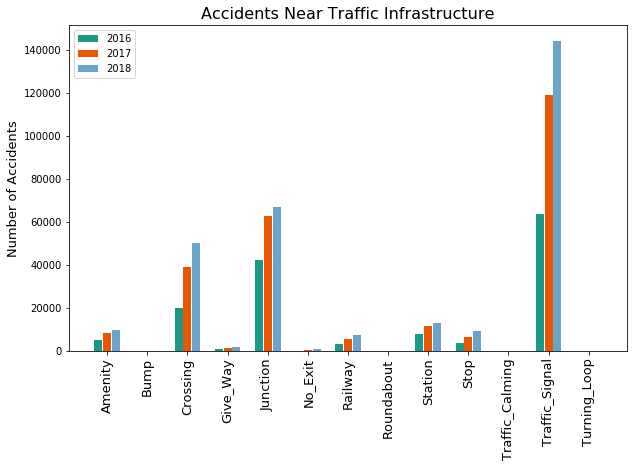

In [29]:
# create graph for accidents near traffic infrastructure

# set up variables to be able to display three sets of data on same graph
x = np.arange(len(infrastructure_list))  # the label locations
width = 0.2  # the width of the bars

# build figures
fig, ax = plt.subplots(figsize = (10,6))
rects1 = ax.bar(x - width*1.1, accident_data_2016, width, label='2016',color="#1a9988")
rects2 = ax.bar(x, accident_data_2017, width, label='2017',color="#eb5600")
rects3 = ax.bar(x + width*1.1, accident_data_2018, width, label='2018',color="#6aa4c8")

# label/design/make graph pretty
ax.set_ylabel('Number of Accidents',fontsize=13)
ax.set_title('Accidents Near Traffic Infrastructure',fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(infrastructure_list,fontsize=13)
ax.legend()
plt.xticks(rotation="vertical")
plt.savefig('Outputs/Accidents_Near_Traffic_Infrastructure.png',bbox_inches="tight")

<h2>Road Type<h2>

In [30]:
# convert street name to list
street_types = ["I-","State Route","Fwy","US-","Pike","CA-","Hwy"]

# include Local roads as last street type
all_street_types = ["I-","State Route","Fwy","US-","Pike","CA-","Hwy","Local Road"]

# initalize lists/variables
streets_2016 = []
streets_2017 = []
streets_2018 = []
i = 0

# count accidents per street type grouped by year
for year in years:
    for street_type in street_types:
        if year == 2016:
            streets_2016.append(df_copy["Street"].loc[(df_copy["Street"].str.contains(street_type)==True) & (df_copy["Start_Year"] == year)].count())
        elif year == 2017:
            streets_2017.append(df_copy["Street"].loc[(df_copy["Street"].str.contains(street_type)==True) & (df_copy["Start_Year"] == year)].count())
        elif year == 2018:
            streets_2018.append(df_copy["Street"].loc[(df_copy["Street"].str.contains(street_type)==True) & (df_copy["Start_Year"] == year)].count())

# calculate local road incidents by assuming they are all noncounted incidents so far
streets_2016.append(total_accidents_per_year[0]-sum(streets_2016))
streets_2017.append(total_accidents_per_year[1]-sum(streets_2017))
streets_2018.append(total_accidents_per_year[2]-sum(streets_2018))

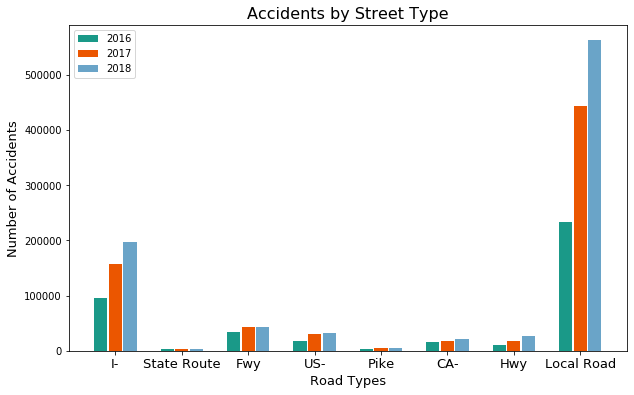

In [31]:
# set up graph parameters for displaying three plots in one
x = np.arange(len(all_street_types))  # the label locations
width = 0.2  # the width of the bars

# create plot
fig, ax = plt.subplots(figsize = (10,6))
rects1 = ax.bar(x - width*1.1, streets_2016, width, label='2016',color="#1a9988")
rects2 = ax.bar(x, streets_2017, width, label='2017',color="#eb5600")
rects3 = ax.bar(x + width*1.1, streets_2018, width, label='2018',color="#6aa4c8")

# label/make graph pretty
ax.set_ylabel('Number of Accidents',fontsize=13)
ax.set_title('Accidents by Street Type',fontsize=16)
ax.set_xlabel('Road Types',fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(all_street_types,fontsize=13)
ax.legend()
plt.savefig('Outputs/Accidents_by_Street_Type.png',bbox_inches="tight")

In [32]:
# calculate percents of accidents on freeway/highway roads

percent_2016 = (sum(streets_2016)-streets_2016[-1])/sum(streets_2016)
percent_2017 = (sum(streets_2017)-streets_2017[-1])/sum(streets_2017)
percent_2018 = (sum(streets_2018)-streets_2018[-1])/sum(streets_2018)

<h2>Cardinal Direction<h2>

In [33]:
# initialize variables
north_stats = 0
south_stats = 0
west_stats = 0
east_stats = 0
northeast_stats = 0
northwest_stats = 0
southeast_stats = 0
southwest_stats = 0
i = 0

# Loop through street column and look for road direction at end of string
for i in range(len(df_copy)):
    
    # get specific cell
    street_name = df_copy.iloc[i,14]
    
    # count based on if the cell has a direction at end of string
    if street_name[-2:] == " N":
        north_stats = north_stats + 1
    elif street_name[-2:] == " S":
        south_stats = south_stats + 1
    elif street_name[-2:] == " W":
        west_stats = west_stats + 1
    elif street_name[-2:] == " E":
        east_stats = east_stats + 1
    if street_name[-3:] == " NE":
        northeast_stats = northeast_stats + 1
    elif street_name[-3:] == " NW":
        northwest_stats = northwest_stats + 1
    elif street_name[-3:] == " SE":
        southeast_stats = southeast_stats + 1
    elif street_name[-3:] == " SW":
        southwest_stats = southwest_stats + 1

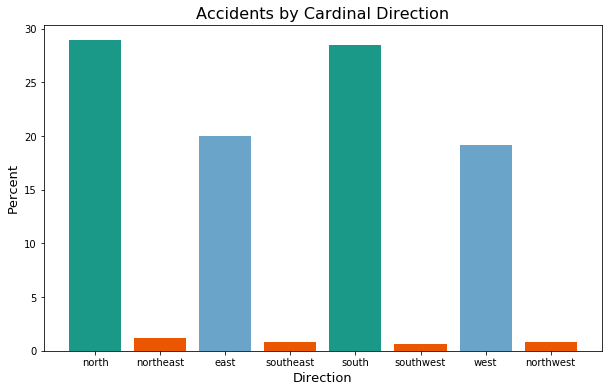

In [34]:
# create bar graph

# create list of numbers per direction and then calculate percents for each
x = [north_stats,northeast_stats,east_stats,southeast_stats,south_stats,southwest_stats,west_stats,northwest_stats]
total_directions = sum(x)
percents = [(i/total_directions)*100 for i in x]

# set up labels for graph
labels = ["north","northeast","east","southeast","south","southwest","west","northwest"]

# create graph/make pretty
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(labels,percents,color=["#1a9988","#eb5600","#6aa4c8","#eb5600","#1a9988","#eb5600","#6aa4c8","#eb5600"])
ax.set_ylabel("Percent",fontsize=13)
ax.set_title("Accidents by Cardinal Direction",fontsize=16)
ax.set_xlabel("Direction",fontsize=13)
plt.savefig('Outputs/Accidents_by_Direction_bar.png',bbox_inches="tight")

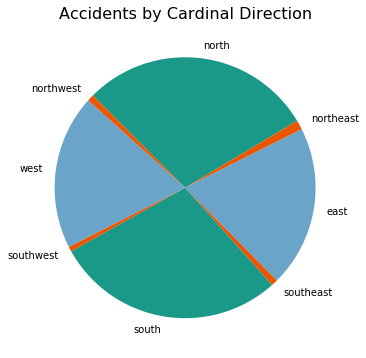

In [35]:
#create pie chart to go with bar chart of cardinal directions
fig, ax = plt.subplots(figsize = (10,6))
ax.pie(x,labels=labels,counterclock=False,startangle=135,colors=["#1a9988","#eb5600","#6aa4c8","#eb5600","#1a9988","#eb5600","#6aa4c8","#eb5600"])
ax.set_title("Accidents by Cardinal Direction",fontsize=16)
plt.savefig('Outputs/Accidents_by_Direction_pie.png',bbox_inches="tight")

<h1>Licensed Drivers by State</h1>


In [36]:
#Create dataframe
df_dlpop = df_dl[["State", "2017"]]
df_dlpop = df_dlpop.rename(columns = {"2017": "Licensed_Drivers_2017"})
df_dlpop = pd.merge(df_dlpop, df_statepop, how="left", left_on=["State"], right_on = "Geographic Area")
df_dlpop = df_dlpop.rename(columns = {"2017": "Population_2017"})
df_dlpop = df_dlpop[["State", "Licensed_Drivers_2017", "Population_2017"]]
df_dlpop = df_dlpop.drop([51])
df_dlpop['Population_2017'] = df_dlpop['Population_2017'].astype(int)
df_dlpop["Perc_Drivers"] = df_dlpop["Licensed_Drivers_2017"] / df_dlpop["Population_2017"] * 100

In [37]:
#Licensed Drivers by State
fig = go.Figure(data=go.Choropleth(locations = df_dlpop['State'], # Spatial coordinates
    z = df_dlpop['Licensed_Drivers_2017'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, 'rgb(255,255,255)'], [1, 'rgb(26,153,136)']],                                  
    colorbar_title = 'Drivers in 2017',
    colorbar = {"thickness": 3, "len": 0.8, "x": .9, "y": .6}
#     text=dl_2017['Text']
))

fig.update_layout(
    title_text = 'Number of Licensed Drivers in 2017',
    title_font_size=20,
    geo_scope='usa', # limite map scope to USA
#     width = 500,
    height = 550
)

fig.show()

##Saving output files
fig.write_image("Outputs/MapLicensedDrivers.png")

In [38]:
# source for the charts: https://plot.ly/python/choropleth-maps/
fig = go.Figure(data=go.Choropleth(locations = df_dlpop['State'], # Spatial coordinates
    z = df_dlpop["Perc_Drivers"], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, 'rgb(255,255,255)'], [1, 'rgb(26,153,136)']],                                  
    colorbar_title = "Drivers to Population, %",
    colorbar = {"thickness": 3, "len": 0.8, "x": .9, "y": .6}
))

fig.update_layout(
    title_text = 'Licensed Drivers Compared to Population in 2017',
    geo_scope='usa', # limite map scope to USA
    #     width = 500,
    height = 550
)

fig.show()

##Saving output files
fig.write_image("Outputs/MapLicensedDriverstoPopulation.png")

<h1>Accidents Reported Over Time</h1>

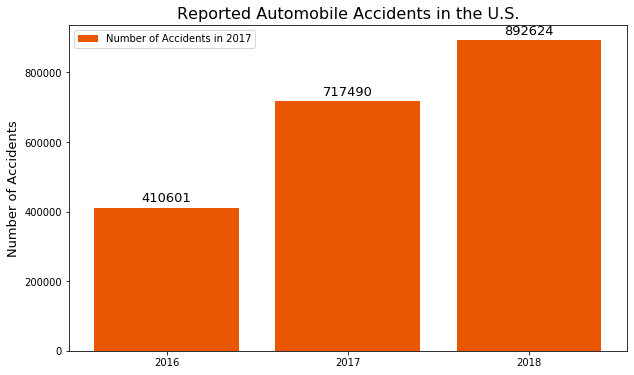

In [39]:
total_2016 = len (df_accidents.loc[df_accidents["Start_Year"] == 2016, :])
total_2017 = len (df_accidents.loc[df_accidents["Start_Year"] == 2017, :])
total_2018 =len (df_accidents.loc[df_accidents["Start_Year"] == 2018, :])

years = ["2016", "2017", "2018"]
total_accidents = [total_2016, total_2017, total_2018]

df_annualaccidents = pd.DataFrame ({"Year": years,
                                  "Accidents": total_accidents})

x = np.arange(len(years))

fig, ax = plt.subplots(figsize = (10,6))
rects = ax.bar(x, total_accidents, color='#eb5600', label='Number of Accidents in 2017')

ax.set_ylabel('Number of Accidents', fontsize = 13)
ax.set_title('Reported Automobile Accidents in the U.S.', fontsize = 16)
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 13)

autolabel(rects)

plt.savefig("Outputs/AnnualUSAccidents.png")
plt.show()

<h1>Accidents by Region</h1>


<h2>by state</h2>


In [40]:
#Create dataframe
#Columns: state, year, id, severity; 
#Select rows: with year = 2017
df_state = df_accidents[["Start_Year", "State", "ID", "Severity"]].loc[df_accidents["Start_Year"] == 2017, :]

#Severity 4 dataframe
df_severestate = df_state.loc[df_state["Severity"] == 4]

#Perform groupby and create dataframes
count_state = df_state.groupby(['State'])["ID"].count()
df_state = pd.DataFrame({"Accidents_2017": count_state})
df_state = df_state.reset_index()

severitycount_state = df_severestate.groupby(['State'])["ID"].count()
df_severestate = pd.DataFrame({"Severity4_Accidents_2017": severitycount_state})

#perform merge
df_state = pd.merge(df_state, df_severestate, how="left", on="State")
df_state = pd.merge(df_state, df_statepop, how="left", left_on="State", right_on = "Geographic Area")
df_state = df_state [["State", "Accidents_2017", "2017", "Severity4_Accidents_2017"]]
df_state = df_state.rename(columns = {"2017": "Population_2017"})
df_state['Population_2017'] = df_state['Population_2017'].astype(int)
df_state = df_state.fillna(0)
df_state['Severity4_Accidents_2017'] = df_state['Severity4_Accidents_2017'].astype(int)
df_state["Acc_Pop_2017"] = df_state["Accidents_2017"] / df_state["Population_2017"] * 1000
df_state["Rate of Severe Accidents"] = df_state["Severity4_Accidents_2017"]/df_state["Accidents_2017"]

In [41]:
fig = go.Figure(data=go.Choropleth(locations = df_state['State'],
    z = df_state['Accidents_2017'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, 'rgb(255,255,255)'], [1, 'rgb(235,86,0)']],
    colorbar_title = 'Number of Accidents in 2017',
    colorbar = {"thickness": 3, "len": 0.8, "x": .9, "y": .6}
))

fig.update_layout(
    title_text = 'Number of Accidents in 2017',
    title_font_size=20,
    geo_scope='usa', # limite map scope to USA
    height = 550
)

fig.show()
fig.write_image("Outputs/MapNumberofAccidents.png")

In [42]:
fig = go.Figure(data=go.Choropleth(locations = df_state['State'], # Spatial coordinates
    z = df_state['Acc_Pop_2017'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, 'rgb(255,255,255)'], [1, 'rgb(235,86,0)']],
    colorbar_title = 'Accidents per 1,000 Population in 2017',
    colorbar = {"thickness": 3, "len": 0.8, "x": .9, "y": .6}
))

fig.update_layout(
    title_text = 'Accidents per 1,000 Population in 2017',
    geo_scope='usa', # limite map scope to USA
    height = 550
)

fig.show()
fig.write_image("Outputs/MapAccidentsperPopulation.png")

In [43]:
fig = go.Figure(data=go.Choropleth(locations = df_state['State'], # Spatial coordinates
    z = df_state['Rate of Severe Accidents'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, 'rgb(255,255,255)'], [1, 'rgb(235,86,0)']],
    colorbar_title = 'Rate of Severe Accidents in 2017',
    colorbar = {"thickness": 3, "len": 0.8, "x": .9, "y": .6}
))

fig.update_layout(
    title_text = 'Rate of Severe Accidents in 2017',
    geo_scope='usa', # limited map scope to USA
    height = 550
)

fig.show()
fig.write_image("Outputs/MapRateSevereAccidents.png")

<h2>by county</h2>

In [44]:
#Create dataframe
#Columns: county, state, year, id, severity; 
#Select rows: with year = 2017
df_county = df_accidents[["Start_Year", "County","State", "ID", "Severity"]].loc[df_accidents["Start_Year"] == 2017, :]
count_county = df_county.groupby(['County','State'])["ID"].count()
df_county = pd.DataFrame({"Accidents_2017": count_county})
df_county = df_county.reset_index()

df_county = pd.merge(df_county, df_countypop, how="outer", on = ["County", "State"])
df_county = df_county [["County", "State", "Accidents_2017", "2017"]]
df_county = df_county.rename(columns = {"2017": "Population_2017"})
df_county["Acc_Pop_2017"] = df_county["Accidents_2017"] / df_county["Population_2017"] * 1000
df_county = df_county.fillna(0)
df_county['Population_2017'] = df_county['Population_2017'].astype(int)
df_county['Accidents_2017'] = df_county['Accidents_2017'].astype(int)
df_county = df_county.sort_values("Accidents_2017", ascending = False)

#Activate code below for table of top counties with accidents and accidents per population
# df_county.head(10)

<h2>by city</h2>

In [45]:
#Create dataframe
#Columns: city, state, year, id, severity; 
#Select rows: with year = 2017
df_city = df_accidents[["Start_Year", "City","State", "ID", "Severity"]].loc[df_accidents["Start_Year"] == 2017, :]
count_city = df_city.groupby(['City','State'])["ID"].count()
df_city = pd.DataFrame({"Accidents_2017": count_city})
df_city = df_city.reset_index()

df_city = pd.merge(df_city, df_citypop, how="outer", on = ["City", "State"])
df_city = df_city [["City", "State", "Accidents_2017", "2017"]]
df_city = df_city.rename(columns = {"2017": "Population_2017"})
df_city["Acc_Pop_2017"] = df_city["Accidents_2017"] / df_city["Population_2017"] * 1000
df_city = df_city.fillna(0)
df_city['Population_2017'] = df_city['Population_2017'].astype(int)
df_city['Accidents_2017'] = df_city['Accidents_2017'].astype(int)
df_city = df_city.sort_values("Accidents_2017", ascending = False)

#Activate code below for table of top cities with accidents and accidents per population
# df_city.head(10)

<h1>Accidents by Time</h1>


In [46]:
#time dataframe for 2017
df_time = df_accidents[["Start_Year", "Start_Month", "Start_Hr", "ID"]].loc[df_accidents["Start_Year"] == 2017, :]

<h2>by month and hour</h2>

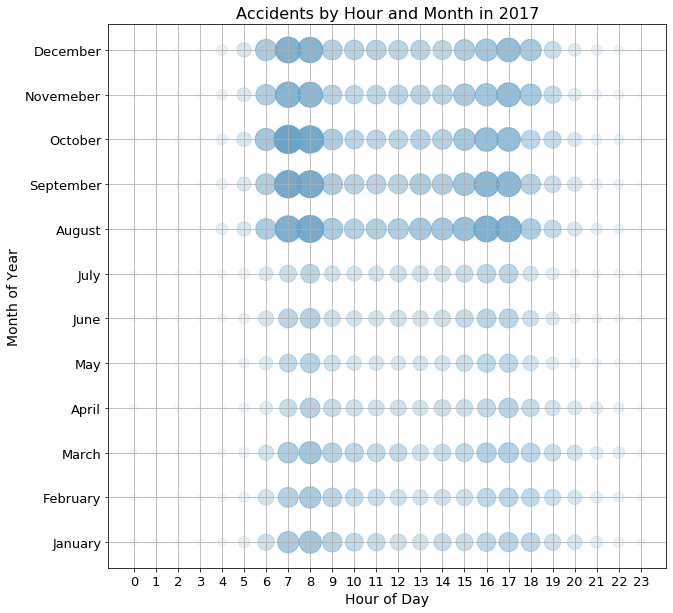

In [47]:
groups_monthhour = df_time.groupby(['Start_Hr', "Start_Month"])["ID"].count()
df_monthhour = pd.DataFrame({"Number of Accidents": groups_monthhour})
df_monthhour=df_monthhour.reset_index()

weights2017 = df_monthhour["Number of Accidents"]/max(df_monthhour["Number of Accidents"])
colors2017 = weights2017.apply(lambda x: (.42,.64,.78,x)).tolist()
y_ticks = df_monthhour["Start_Month"]

plt.figure(figsize=(10,10))
max_accidents2017 = float(max(df_monthhour["Number of Accidents"]))
plt.scatter(df_monthhour["Start_Hr"], df_monthhour["Start_Month"], c=colors2017, s = df_monthhour["Number of Accidents"]/10)

plt.title("Accidents by Hour and Month in 2017", fontsize = 16)
plt.xlabel("Hour of Day", fontsize = 14)
plt.ylabel("Month of Year", fontsize = 14)
y_axis = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "Novemeber", "December"]
plt.yticks(np.arange(1,len(y_axis)+1), y_axis, fontsize= 13)
x_axis = np.arange(0, 24)
plt.xticks(np.arange(0, len(x_axis)), x_axis, fontsize = 13)
plt.grid()

# # # Save our graph and show the graph
# plt.tight_layout()
plt.savefig("Outputs/2017_AccidentsbyHourandMonth2017.png")
plt.show()

<h2>by month</h2>


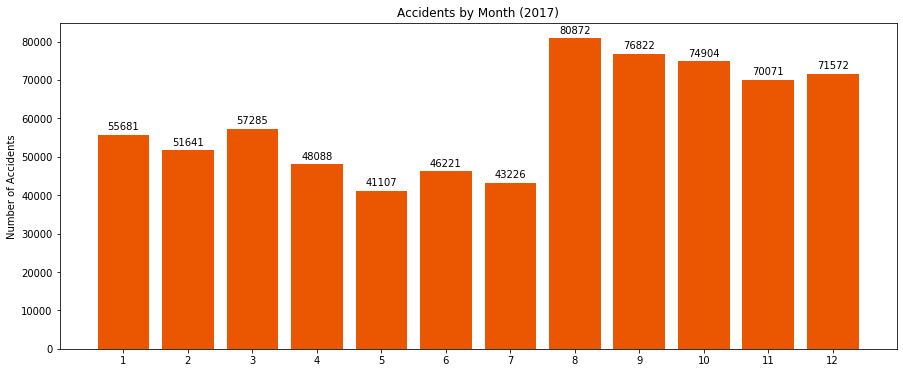

In [48]:
#time of month for 2017
count_month = df_time.groupby('Start_Month')["ID"].count()
df_month = pd.DataFrame({"Number of Accidents": count_month})
df_month = df_month.reset_index()

labels = df_month["Start_Month"]

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize = (15,6))
rects = ax.bar(x, df_month["Number of Accidents"], color='#eb5600')

ax.set_ylabel('Number of Accidents')
ax.set_title('Accidents by Month (2017)')
ax.set_xticks(x)
ax.set_xticklabels(labels)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects)

plt.savefig("Outputs/AccidentsbyMonth.png")
plt.show()

<h2>by hour</h2>


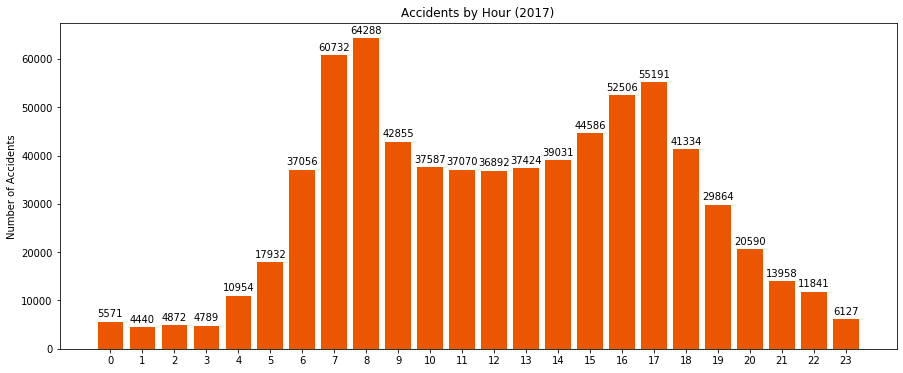

In [49]:
#time of day for 2017
count_hour = df_time.groupby('Start_Hr')["ID"].count()
df_hour = pd.DataFrame({"Number of Accidents": count_hour})
df_hour = df_hour.reset_index()

labels = df_hour["Start_Hr"]

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize = (15,6))
rects = ax.bar(x, df_hour["Number of Accidents"], color='#eb5600')

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Accidents')
ax.set_title('Accidents by Hour (2017)')
ax.set_xticks(x)
ax.set_xticklabels(labels)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects)

plt.savefig("Outputs/2017_AccidentsbyHour.png")
plt.show()

<h1>Weather Conditions</h1>

In [50]:
# Create Chart Weather and State of Accidents (2016-2018)

# 01 - DF with Weather Condition, State and counts
df_weather_state = pd.DataFrame(df_weather.groupby(['Weather_Condition_Corrected','State'])['ID'].count().reset_index())


In [51]:
# Create Chart Weather and State of Accidents (2016-2018)

# 02 - DF to add percentages of each Weather Type in the Chart
df_weather_global = pd.DataFrame(df_weather.groupby(['Weather_Condition_Corrected'])['ID'].count().reset_index())
df_weather_global['Percent'] = ((df_weather_global['ID'] / df_weather_global['ID'].sum()) * 100).round(1)
df_weather_global

,Weather_Condition_Corrected,ID,Percent
0,Clear,742981,38.0
1,Cloudy,993376,50.8
2,Dust,147,0.0
3,Fog,39841,2.0
4,Hail,297,0.0
5,Rain,132625,6.8
6,Smoke,2961,0.2
7,Snow,29742,1.5
8,Squalls,22,0.0
9,Thunderstorm,13740,0.7


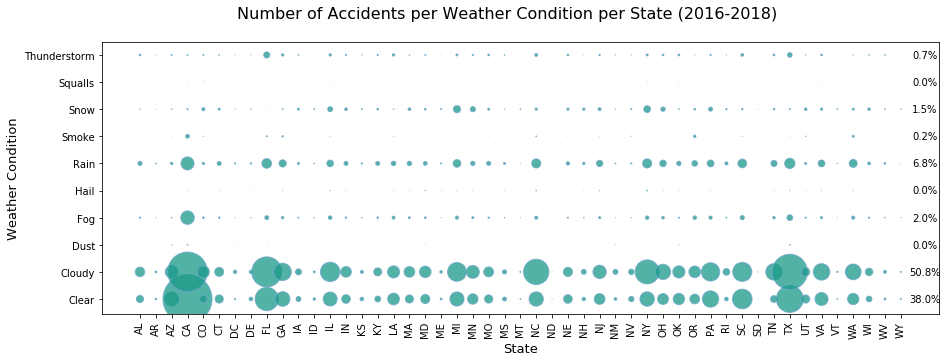

In [52]:
# Create Chart Weather and State of Accidents (2016-2018)

# 03 - Create chart for Weather Condition per State

fig = plt.figure(figsize=(15,5))
st = fig.suptitle('Number of Accidents per Weather Condition per State (2016-2018)', fontsize=16)

x_axis = list(df_weather_state['State'])
data = list(df_weather_state['Weather_Condition_Corrected'])
size = [i / 100 for i in list(df_weather_state['ID'])]

plt.scatter(x_axis, data, marker="o", facecolors="#1a9988", edgecolors="#6aa4c8",
            s=size, alpha=0.75)
plt.xticks(rotation="vertical")
plt.xlabel("State", fontsize=13)
plt.ylabel("Weather Condition", fontsize=13)
plt.tight_layout

# Add percentages on the right side of the chart
heights = list(df_weather_global['Percent'])

for i in range(0,len(heights)):
    plt.text(49.5, i, '{}%'.format(heights[i]), horizontalalignment='center', verticalalignment='center')

# Save Chart in png
plt.savefig("Outputs/State_per_weather_condition.png")



<h1>Normalized number of accidents per Weather Conditions</h1>

In [53]:
# Create Chart Accidents per weather condition in Denver, San Francisco and Rhode Island in 2018, according to
# days per year that weather condition occured

# 01 - Create DF with days of weather condition per year and per city

weather_days_summary = pd.DataFrame(weather_days_dv_ri_sf.groupby(['NAME', 'YEAR', 'Weather_cond'])['DATE'].count().reset_index())
weather_days_summary.rename(columns={'DATE': 'Count'}, inplace = True)
weather_days_summary_final = pd.DataFrame(weather_days_summary.pivot_table(columns = 'YEAR', index = ('NAME', 'Weather_cond'), values = 'Count').reset_index())
weather_days_summary_final['NAME'] = weather_days_summary_final['NAME'].replace({'DENVER INTERNATIONAL AIRPORT, CO US': 'Denver',
                                            'PROVIDENCE, RI US': 'RI',
                                            'SAN FRANCISCO INTERNATIONAL AIRPORT, CA US': 'San Francisco'})

In [54]:
# Create Chart Accidents per weather condition in Denver, San Francisco and Rhode Island in 2018, according to
# days per year that weather condition occured

# 02 - Create unique DF with combines days of weather condition per year and per city and number of accidents per
# and per city

# 021 - Create filter for the 3 places to check
df_weather_den_sfo_ri = df_weather[((df_weather['City'] == 'Denver') & (df_weather['State'] == 'CO')) | 
                                (df_weather['City'] == 'San Francisco') |
                                (df_weather['State'] == 'RI')]

# 022 - Merge Clear and Cloudy and prepare table to merge with weather_days_summary_final
df_weather_den_sfo_ri['Weather_Condition_Corrected2'] = df_weather_den_sfo_ri['Weather_Condition_Corrected']
df_weather_den_sfo_ri['Weather_Condition_Corrected2'] = df_weather_den_sfo_ri['Weather_Condition_Corrected2'].replace(
    {"Clear": "Clear/Cloudy",
     "Cloudy": "Clear/Cloudy"})
df_weather_den_sfo_ri.rename(columns={'State': 'NAME'}, inplace = True)
df_weather_den_sfo_ri['NAME'] = df_weather_den_sfo_ri['NAME'].replace({'CO': 'Denver',
                                            'CA': 'San Francisco'})

df_weather_den_sfo_ri = pd.DataFrame(df_weather_den_sfo_ri.groupby(['Weather_Condition_Corrected2',
                                                            'Start_Year', 'NAME'])['ID'].count().reset_index())
df_weather_den_sfo_ri_trans = pd.DataFrame(df_weather_den_sfo_ri.pivot_table(index=('Weather_Condition_Corrected2', 'NAME'), 
                                                        columns='Start_Year', values='ID').reset_index())

# 023 - Merge with table weather_days_summary_final
df_weather_den_sfo_ri_norm = df_weather_den_sfo_ri_trans.merge(weather_days_summary_final, 
                                                               left_on=['Weather_Condition_Corrected2','NAME'],
                                                               right_on=['Weather_cond', 'NAME'],
                                                               suffixes=('_acc', '_days'),
                                                               how='outer')

# 024 - Normalize the accidents per day of weather type
df_weather_den_sfo_ri_norm['2016_norm'] = df_weather_den_sfo_ri_norm['2016_acc'] / df_weather_den_sfo_ri_norm['2016_days']
df_weather_den_sfo_ri_norm['2017_norm'] = df_weather_den_sfo_ri_norm['2017_acc'] / df_weather_den_sfo_ri_norm['2017_days']
df_weather_den_sfo_ri_norm['2018_norm'] = df_weather_den_sfo_ri_norm['2018_acc'] / df_weather_den_sfo_ri_norm['2018_days']

df_weather_den_sfo_ri_norm['Weather_Type'] = ''

for i in range(0,len(df_weather_den_sfo_ri_norm)):
    if df_weather_den_sfo_ri_norm.iloc[i,0] == df_weather_den_sfo_ri_norm.iloc[i,5]:
        df_weather_den_sfo_ri_norm.iloc[i,12] = df_weather_den_sfo_ri_norm.iloc[i,0]
    elif pd.isnull(df_weather_den_sfo_ri_norm.iloc[i,0]):
        df_weather_den_sfo_ri_norm.iloc[i,12] = df_weather_den_sfo_ri_norm.iloc[i,5]
    else:
        df_weather_den_sfo_ri_norm.iloc[i,12] = df_weather_den_sfo_ri_norm.iloc[i,0]
        
df_weather_den_sfo_ri_norm = df_weather_den_sfo_ri_norm[['Weather_Type', 'NAME', '2016_acc', '2017_acc',
       '2018_acc', '2016_days', '2017_days', '2018_days', '2016_norm', '2017_norm', '2018_norm']]

# 025 - Delete irrelevant rows
df_weather_den_sfo_ri_norm['WT_times'] = ''

for i in range(0,len(df_weather_den_sfo_ri_norm)):
    df_weather_den_sfo_ri_norm.iloc[i,11] = df_weather_den_sfo_ri_norm.loc[df_weather_den_sfo_ri_norm['Weather_Type'] == df_weather_den_sfo_ri_norm.iloc[i,0], 'Weather_Type'].count()

index_rows = df_weather_den_sfo_ri_norm[(df_weather_den_sfo_ri_norm['WT_times'] == 1) & (np.isnan(df_weather_den_sfo_ri_norm['2018_norm']))].index

df_weather_den_sfo_ri_norm.drop(index_rows , inplace=True)

df_weather_den_sfo_ri_norm.sort_values(by=['Weather_Type'], inplace = True)

df_weather_den_sfo_ri_norm.reset_index(drop = True, inplace = True)

In [55]:
# Create Chart Accidents per weather condition in Denver, San Francisco and Rhode Island in 2018, according to
# days per year that weather condition occured

# 03 - Create table for each location to have each data for each bar series in the bar chart

df_weather_sf_trans_norm = df_weather_den_sfo_ri_norm[df_weather_den_sfo_ri_norm['NAME'] == 'San Francisco']
df_weather_denver_trans_norm = df_weather_den_sfo_ri_norm[df_weather_den_sfo_ri_norm['NAME'] == 'Denver']
df_weather_ri_trans_norm = df_weather_den_sfo_ri_norm[df_weather_den_sfo_ri_norm['NAME'] == 'RI']

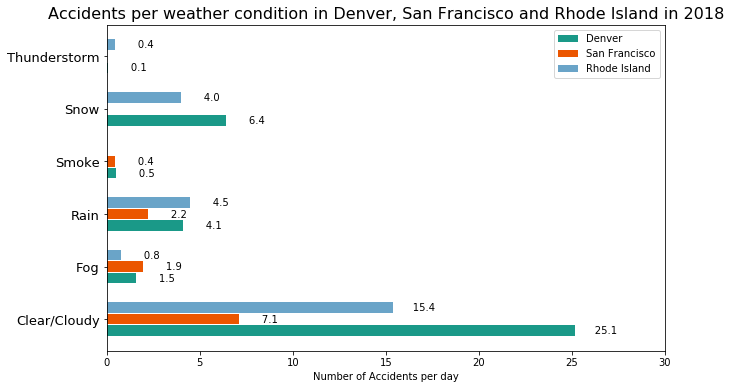

In [56]:
# Create Chart Accidents per weather condition in Denver, San Francisco and Rhode Island in 2018, according to
# days per year that weather condition occured

# 04 - Create Chart

width = 0.2
x = np.arange(len(df_weather_denver_trans_norm['Weather_Type']))
labels = df_weather_denver_trans_norm['Weather_Type']

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.barh(x - width*1.1, list(df_weather_denver_trans_norm['2018_norm']), width, label='Denver', color="#1a9988")
rects2 = ax.barh(x , list(df_weather_sf_trans_norm['2018_norm']), width, label='San Francisco', color="#eb5600")
rects3 = ax.barh(x + width*1.1, list(df_weather_ri_trans_norm['2018_norm']), width, label='Rhode Island', color="#6aa4c8")

ax.set_xlabel('Number of Accidents per day')
ax.set_title('Accidents per weather condition in Denver, San Francisco and Rhode Island in 2018', fontsize=16)
ax.set_yticks(x)
ax.set_xticks(np.arange(0,31,5))
ax.set_yticklabels(labels, fontsize=13)
ax.legend(loc = 'upper right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{0:10.1f}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(1, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='left', va='center')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.savefig("Outputs/Accidents_per_weather_condition_Denver_SF_RI.png", bbox_inches='tight')

<h1>Number of Accidents per Day and Night for 2016-2018</h1>

In [57]:
# Create Chart Number of accidents per Day/Night for 2016-2018

# 01 - Create DataFrame to hold the data for chart Day/Night

df_dn = pd.DataFrame(df_weather.groupby(['Sunrise_Sunset','Start_Year'])['ID'].count().reset_index())
df_dn = df_dn.pivot(index='Sunrise_Sunset', columns = 'Start_Year', values = 'ID')

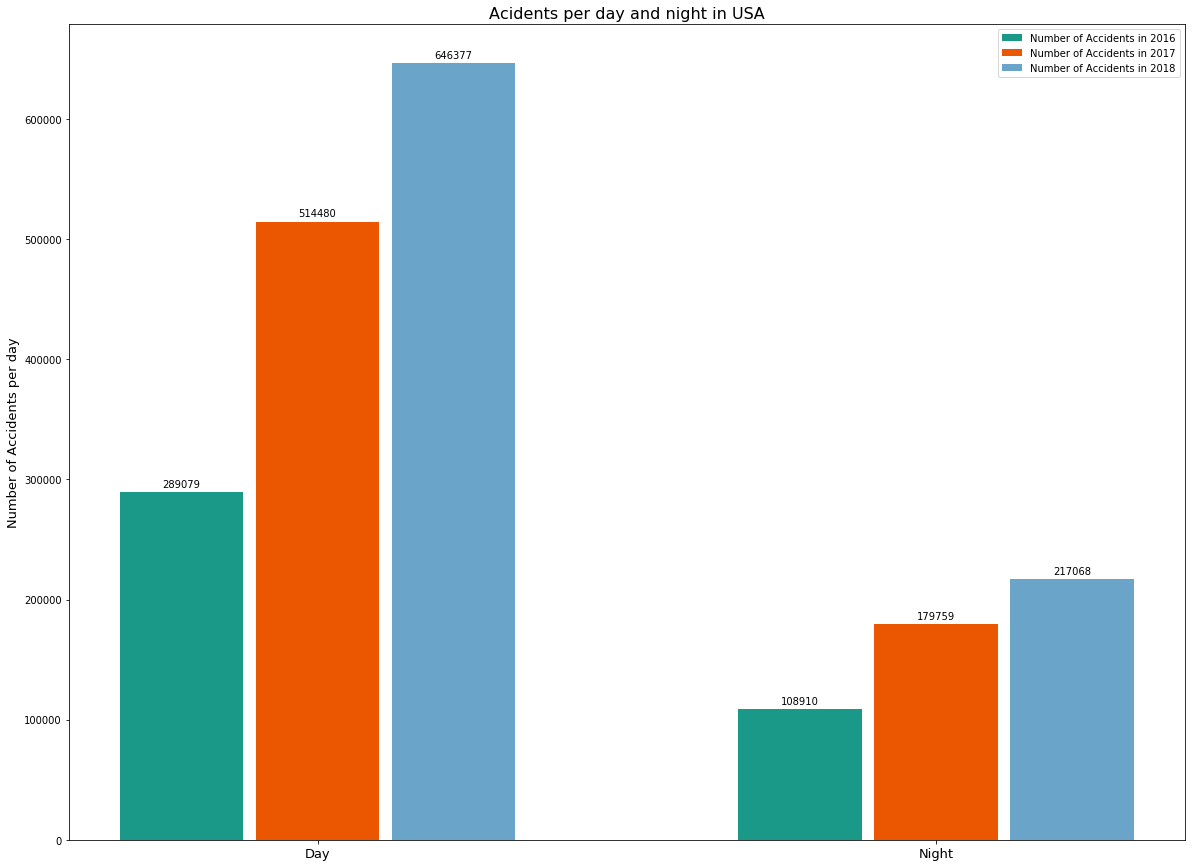

In [58]:
# Create Chart Number of accidents per Day/Night for 2016-2018

# 02 - Create Chart

width = 0.2 
x = np.arange(len(df_dn.index)) 
labels = list(df_dn.index)

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width*1.1, list(df_dn[2016]), width, label='Number of Accidents in 2016', color="#1a9988")
rects2 = ax.bar(x, list(df_dn[2017]), width, label='Number of Accidents in 2017', color="#eb5600")
rects3 = ax.bar(x + width*1.1, list(df_dn[2018]), width, label='Number of Accidents in 2018', color="#6aa4c8")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Accidents per day', fontsize=13)
ax.set_title('Acidents per day and night in USA', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=13)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height().round(1)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.savefig("Outputs/Accidents_per_day_and_night_USA.png", bbox_inches='tight')

<h1>Choropleth chart for the relation day/night per State per year</h1>

In [59]:
# Create Choropleth chart for the relation day/night per State per year

# 01 - Create DataFrame to hold the data for chart Day/Night per US state
df_dn_state = pd.DataFrame(df_weather.groupby(['Sunrise_Sunset','Start_Year', 'State'])['ID'].count().reset_index())
df_dn_state = df_dn_state.pivot_table(index=('Start_Year','State'), columns = 'Sunrise_Sunset', values = 'ID').reset_index()
df_dn_state['Day/Night'] = df_dn_state['Day'] / df_dn_state['Night']


In [60]:
# Create Choropleth chart for the relation day/night per State per year

# 02 - Create text to appear when we pass the mouse on top of each state

df_dn_state['Text'] = 'Year ' + df_dn_state['Start_Year'].astype(str) + '<br>' +\
'Accidents during the day: ' + df_dn_state['Day'].astype(str) + "<br>" +\
'Accidents during the night: ' + df_dn_state['Night'].astype(str) + '<br>' +\
'State: ' + df_dn_state['State']

<h2>2018</h2>

In [70]:
# Create Choropleth chart for the relation day/night per State per year

# 03 - Create the chart for 2018

df_dn_state_2018 = df_dn_state[df_dn_state['Start_Year'] == 2018]


# source for the charts: https://plot.ly/python/choropleth-maps/
fig = go.Figure(data=go.Choropleth(locations = df_dn_state_2018['State'], # Spatial coordinates
    z = df_dn_state_2018['Day/Night'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, 'rgb(255,255,255)'], [1, 'rgb(62,127,168)']],
    colorbar_title = 'Number of Acidents Day vs. Night',
    colorbar = {"thickness": 3, "len": 0.8, "x": .9, "y": .6},
    text=df_dn_state_2018['Text'],
))

fig.update_layout(
    title_text = 'Number of Acidents During the Day vs During the Night in 2018',
    geo_scope='usa', # limite map scope to USA
)

fig.show()
fig.write_image("Outputs/Map_accidents_day_night_2018.png")

<h2>2017</h2>

In [62]:
# Create Choropleth chart for the relation day/night per State per year

# 04 - Create the chart for 2017

df_dn_state_2017 = df_dn_state[df_dn_state['Start_Year'] == 2017]


# source for the charts: https://plot.ly/python/choropleth-maps/
fig = go.Figure(data=go.Choropleth(locations = df_dn_state_2017['State'], # Spatial coordinates
    z = df_dn_state_2017['Day/Night'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, 'rgb(255,255,255)'], [1, 'rgb(62,127,168)']],
    colorbar_title = 'Number of Acidents Day vs. Night',
    colorbar = {"thickness": 3, "len": 0.8, "x": .9, "y": .6},
    text=df_dn_state_2017['Text'],
))

fig.update_layout(
    title_text = 'Number of Acidents During the Day vs During the Night in 2017',
    geo_scope='usa', # limite map scope to USA
)

fig.show()
fig.write_image("Outputs/Map_accidents_day_night_2017.png")

<h2>2016</h2>

In [71]:
# Create Choropleth chart for the relation day/night per State per year

# 05 - Create the chart for 2016

df_dn_state_2016 = df_dn_state[df_dn_state['Start_Year'] == 2016]


# source for the charts: https://plot.ly/python/choropleth-maps/
fig = go.Figure(data=go.Choropleth(locations = df_dn_state_2016['State'], # Spatial coordinates
    z = df_dn_state_2016['Day/Night'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = [[0, 'rgb(255,255,255)'], [1, 'rgb(62,127,168)']],
    colorbar_title = 'Number of Acidents Day vs. Night',
    colorbar = {"thickness": 3, "len": 0.8, "x": .9, "y": .6},
    text=df_dn_state_2016['Text'],
))

fig.update_layout(
    title_text = 'Number of Acidents During the Day vs During the Night in 2016',
    geo_scope='usa', # limite map scope to USA
)

fig.show()
fig.write_image("Outputs/Map_accidents_day_night_2016.png")